In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 코랩 폰트 깨짐 해결 ( plt.rc('font', family='NanumBarunGothic') )
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,849 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and dire

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [ ]:
file = r'/content/drive/MyDrive/Classroom/재난상황 대피요령 인지 실태조사.csv'
raw_csv = pd.read_csv(file)
raw_csv

,Unnamed: 0,경계경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,공습경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,화생방경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,핵경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,지진경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,지진해일경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,태풍경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,홍수경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,화산주의경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?
0,2024. 4. 15 오전 1:28:22,2,1,3,1,3,2,2,1,1
1,2024. 4. 15 오전 1:29:20,3,3,3,3,3,3,3,3,3
2,2024. 4. 15 오전 1:29:46,1,1,1,1,1,1,1,1,1
3,2024. 4. 15 오전 1:30:36,2,2,3,1,3,3,3,2,1
4,2024. 4. 15 오전 1:33:37,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
125,2024. 4. 17 오전 11:56:06,1,3,3,5,3,3,3,3,1
126,2024. 4. 17 오후 1:47:33,2,2,2,2,2,2,3,3,3
127,2024. 4. 18 오후 12:27:06,2,2,2,4,2,2,4,2,2
128,2024. 4. 18 오후 9:58:38,2,2,2,2,2,2,2,2,2


In [ ]:
raw_csv = raw_csv.drop('Unnamed: 0', axis=1)
raw_csv

,경계경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,공습경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,화생방경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,핵경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,지진경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,지진해일경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,태풍경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,홍수경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,화산주의경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?
0,2,1,3,1,3,2,2,1,1
1,3,3,3,3,3,3,3,3,3
2,1,1,1,1,1,1,1,1,1
3,2,2,3,1,3,3,3,2,1
4,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
125,1,3,3,5,3,3,3,3,1
126,2,2,2,2,2,2,3,3,3
127,2,2,2,4,2,2,4,2,2
128,2,2,2,2,2,2,2,2,2


In [ ]:
response_counts = raw_csv.apply(pd.Series.value_counts)
response_counts

,경계경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,공습경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,화생방경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,핵경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,지진경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,지진해일경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,태풍경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,홍수경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,화산주의경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?
1,33,39,33,45,19,26,23,32,70
2,46,44,35,37,20,33,25,45,28
3,29,25,24,23,23,34,31,29,17
4,10,10,20,10,46,21,34,14,6
5,12,12,18,15,22,16,17,10,9


In [ ]:
response_counts = response_counts.fillna(0)

In [ ]:
response_counts.index = ['전혀 모름', '잘 모름', '보통', '잘 알고있음', '매우 잘 알고있음']

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51025 (\N{HANGUL SYLLABLE EUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  func(*

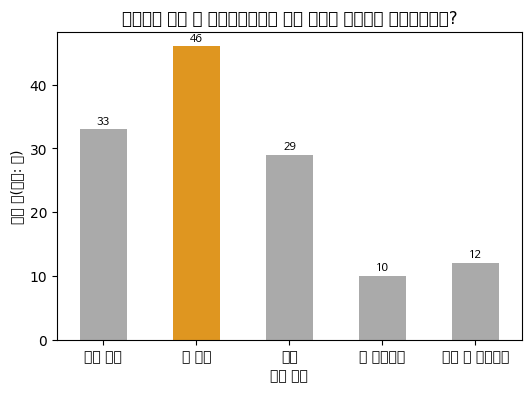

In [ ]:
#bar 시각화
fig, ax = plt.subplots(figsize=(6, 4))
plt.rc('font', family='NanumBarunGothic')
palette = ['#aaaaaa' if (x < max(response_counts['경계경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?'])) else '#FF9D00' for x in response_counts['경계경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?']]
splot = sns.barplot(x=response_counts.index, y=response_counts['경계경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?'],
                    hue=response_counts.index, palette = palette, width=0.5)
##plt.ticklabel_format(style='plain', axis='y') #지수형식을 숫자형식으로 바꿔줌
plt.title('경계경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?')
plt.xlabel('응답 항목')
plt.ylabel('응답 수(단위: 명)')
## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 6),
                   textcoords='offset points')

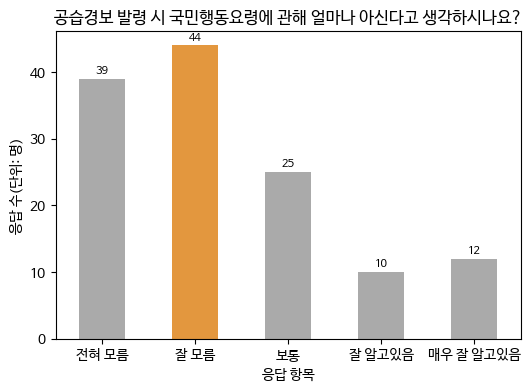

In [ ]:
#bar 시각화
fig, ax = plt.subplots(figsize=(6, 4))
plt.rc('font', family='NanumBarunGothic')
palette = ['#aaaaaa' if (x < max(response_counts['공습경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?'])) else '#FF9922' for x in response_counts['공습경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?']]
splot = sns.barplot(x=response_counts.index, y=response_counts['공습경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?'],
                    hue=response_counts.index, palette = palette, width=0.5)
##plt.ticklabel_format(style='plain', axis='y') #지수형식을 숫자형식으로 바꿔줌
plt.title('공습경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?')
plt.xlabel('응답 항목')
plt.ylabel('응답 수(단위: 명)')
## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 6),
                   textcoords='offset points')

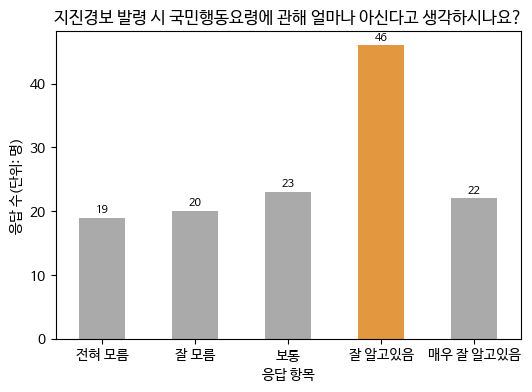

In [ ]:
#bar 시각화
fig, ax = plt.subplots(figsize=(6, 4))
plt.rc('font', family='NanumBarunGothic')
palette = ['#aaaaaa' if (x < max(response_counts['지진경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?'])) else '#FF9922' for x in response_counts['지진경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?']]
splot = sns.barplot(x=response_counts.index, y=response_counts['지진경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?'],
                    hue=response_counts.index, palette = palette, width=0.5)
##plt.ticklabel_format(style='plain', axis='y') #지수형식을 숫자형식으로 바꿔줌
plt.title('지진경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?')
plt.xlabel('응답 항목')
plt.ylabel('응답 수(단위: 명)')
## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 6),
                   textcoords='offset points')

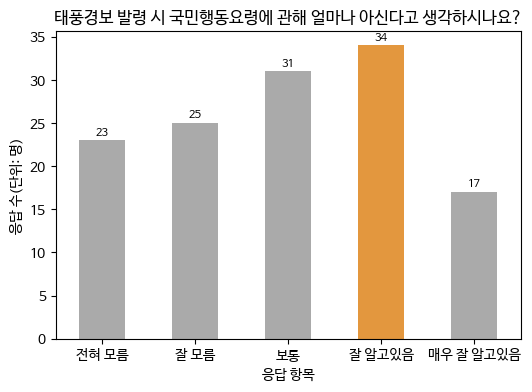

In [ ]:
#bar 시각화
fig, ax = plt.subplots(figsize=(6, 4))
plt.rc('font', family='NanumBarunGothic')
palette = ['#aaaaaa' if (x < max(response_counts['태풍경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?'])) else '#FF9922' for x in response_counts['태풍경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?']]
splot = sns.barplot(x=response_counts.index, y=response_counts['태풍경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?'],
                    hue=response_counts.index, palette = palette, width=0.5)
##plt.ticklabel_format(style='plain', axis='y') #지수형식을 숫자형식으로 바꿔줌
plt.title('태풍경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?')
plt.xlabel('응답 항목')
plt.ylabel('응답 수(단위: 명)')
## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 6),
                   textcoords='offset points')

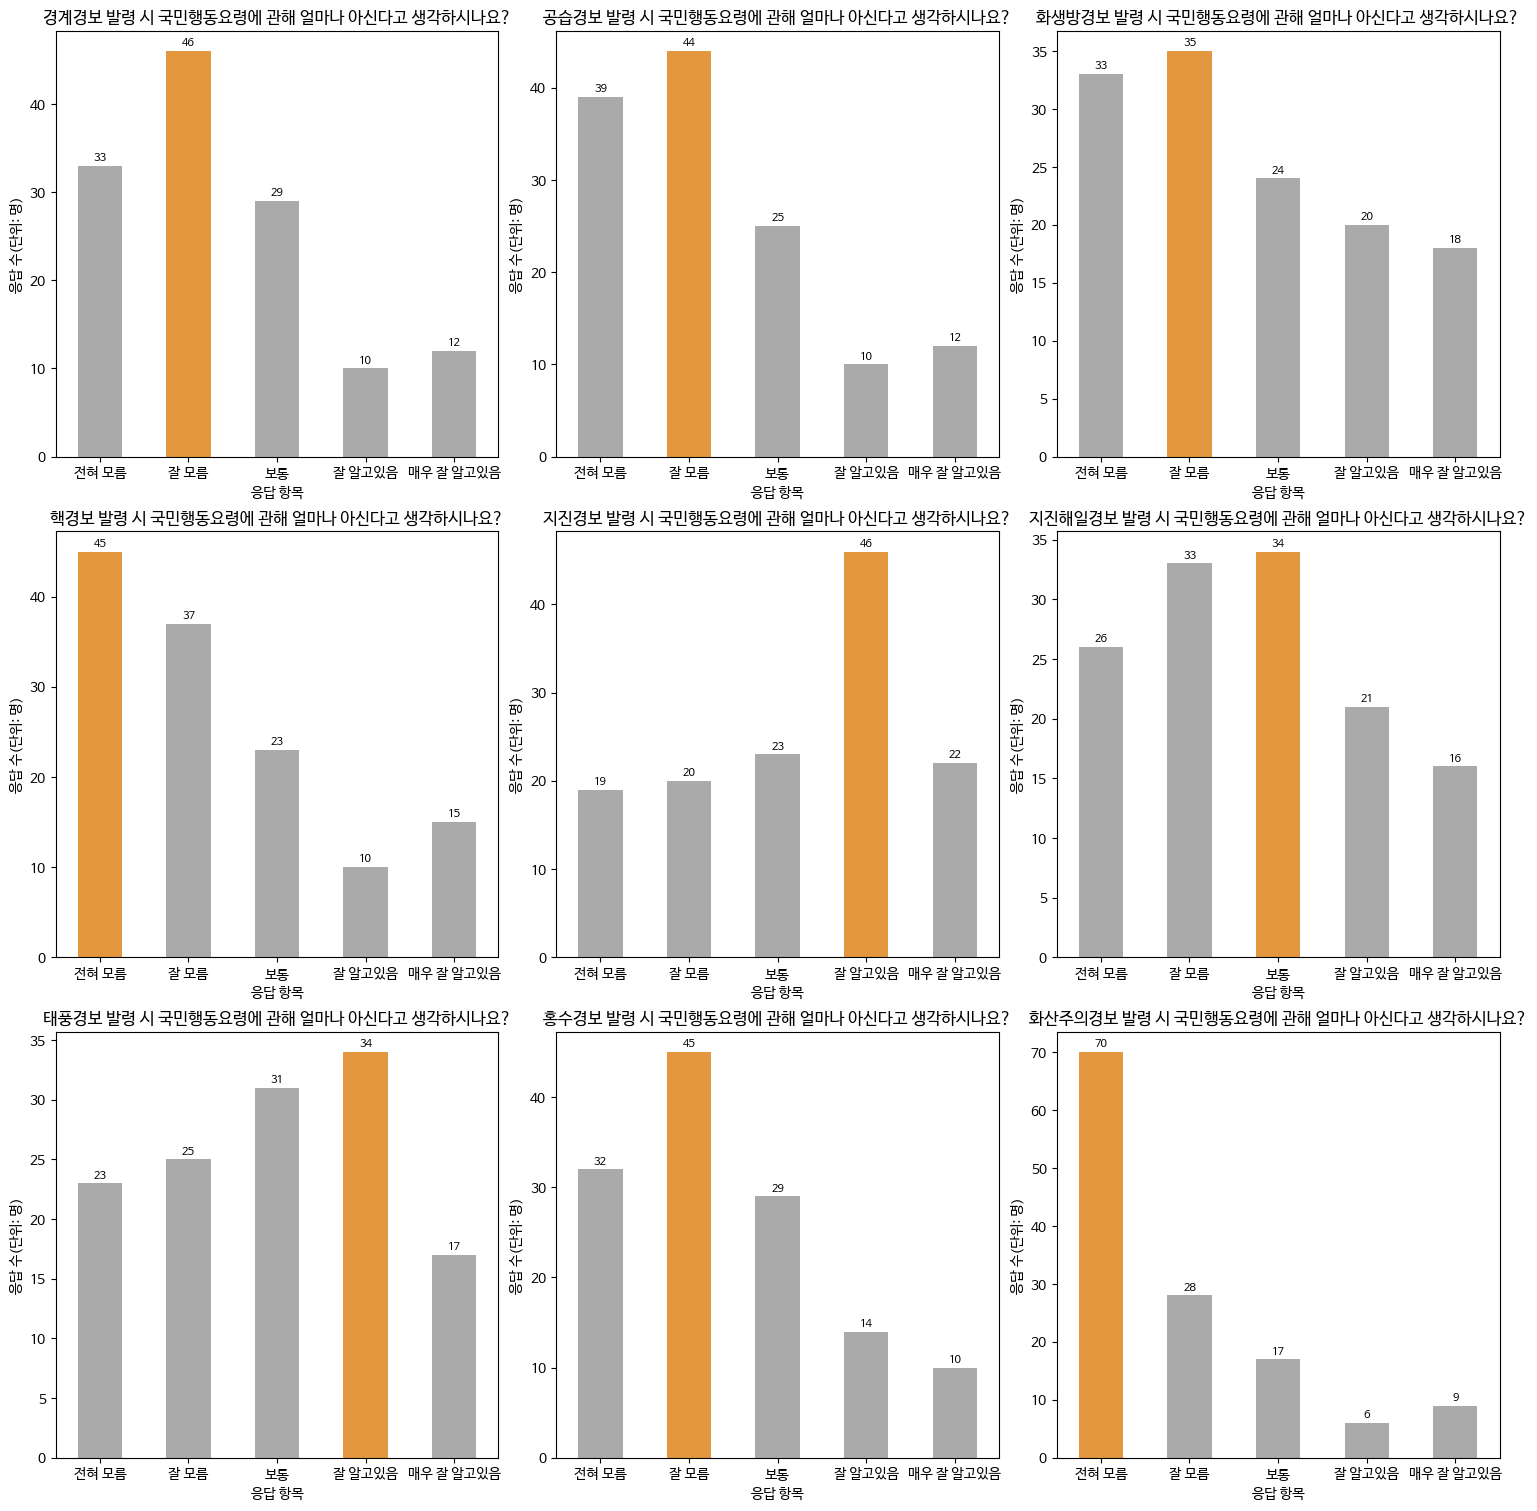

In [ ]:
lst=['경계경보', '공습경보', '화생방경보', '핵경보', '지진경보', '지진해일경보', '태풍경보', '홍수경보', '화산주의경보']
fig, axes = plt.subplots(constrained_layout=True, nrows=3, ncols=3, figsize=(15,15))
for i, s in enumerate(lst):
  row = i//3
  col = i%3
  plt.rc('font', family='NanumBarunGothic')
  palette = ['#aaaaaa' if (x < max(response_counts[f'{s} 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?'])) else '#FF9922' for x in response_counts[f'{s} 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?']]
  splot = sns.barplot(x=response_counts.index, y=response_counts[f'{s} 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?'],
                    hue=response_counts.index, palette = palette, width=0.5, ax=axes[row][col])
  ##plt.ticklabel_format(style='plain', axis='y') #지수형식을 숫자형식으로 바꿔줌
  axes[row][col].set_title(f'{s} 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?')
  axes[row][col].set_xlabel('응답 항목')
  axes[row][col].set_ylabel('응답 수(단위: 명)')
  ## 그래프 값 라벨링 하기(y축)
  for bar in splot.patches: # value label 생성
      splot.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 6),
                    textcoords='offset points')

In [ ]:
import math

response_counts['주요재난상황 시 국민행동요령에 대한 인식도 평균'] = (response_counts['경계경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?']\
                    + response_counts['공습경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?']\
                    + response_counts['화생방경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?']\
                    + response_counts['핵경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?']\
                    + response_counts['지진경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?']\
                    + response_counts['지진해일경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?']\
                    + response_counts['태풍경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?']\
                    + response_counts['홍수경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?']\
                    + response_counts['화산주의경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?'])/9
all_values = response_counts['주요재난상황 시 국민행동요령에 대한 인식도 평균'].sum()

In [ ]:
response_counts

,경계경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,공습경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,화생방경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,핵경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,지진경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,지진해일경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,태풍경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,홍수경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,화산주의경보 발령 시 국민행동요령에 관해 얼마나 아신다고 생각하시나요?,주요재난상황 시 국민행동요령에 대한 인식도 평균
전혀 모름,33,39,33,45,19,26,23,32,70,35.555556
잘 모름,46,44,35,37,20,33,25,45,28,34.777778
보통,29,25,24,23,23,34,31,29,17,26.111111
잘 알고있음,10,10,20,10,46,21,34,14,6,19.000000
매우 잘 알고있음,12,12,18,15,22,16,17,10,9,14.555556


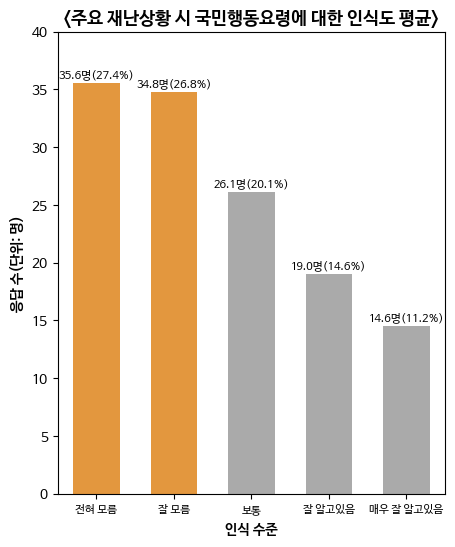

In [ ]:
#bar 시각화
fig, ax = plt.subplots(figsize=(5, 6))
plt.rc('font', family='NanumBarunGothic')
palette = ['#FF9922' if x == "전혀 모름" or x == "잘 모름" else '#AAAAAA' for x in response_counts.index]
splot = sns.barplot(x=response_counts.index, y=response_counts['주요재난상황 시 국민행동요령에 대한 인식도 평균'],
                    hue=response_counts.index, palette = palette, width=0.6)
plt.ylim(0, 40)
plt.title('<주요 재난상황 시 국민행동요령에 대한 인식도 평균>', size=13, weight='bold')
plt.xlabel('인식 수준', weight='bold')
plt.xticks(size=8)
plt.ylabel('응답 수(단위: 명)', weight='bold')
## 그래프 값 라벨링 하기(y축)
for bar in splot.patches: # value label 생성
    ax.annotate('{:.1f}명({:.1f}%)'.format(bar.get_height(), bar.get_height()/all_values*100), # 백분율 계산
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 6),
                   textcoords='offset points')